In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


pd.set_option('display.max_columns', None)

# Parsing

In [198]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import re

options = webdriver.ChromeOptions() 
options.add_argument("user-data-dir=/Users/andrey/Library/Application\ Support/Google/Chrome/Default") #Path to your chrome profile
w = webdriver.Chrome(executable_path="/Applications/Google\ Chrome.app", chrome_options=options)

/var/folders/g5/t0xcfm553jdfz_ghyf8w7s3m0000gn/T/ipykernel_62349/2207787516.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  w = webdriver.Chrome(executable_path="/Applications/Google\ Chrome.app", chrome_options=options)
/var/folders/g5/t0xcfm553jdfz_ghyf8w7s3m0000gn/T/ipykernel_62349/2207787516.py:8: DeprecationWarning: use options instead of chrome_options
  w = webdriver.Chrome(executable_path="/Applications/Google\ Chrome.app", chrome_options=options)


In [276]:
!pip install urllib2

ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [283]:
import requests
from bs4 import BeautifulSoup

from urllib.request import Request, urlopen

# price_block = []
# rating_block = []
# review_block = []

parsed_ISBN = set([el['ISBN'] for el in rating_block])

ISBN_values = np.unique(book_df['details_ISBN'].dropna().values)

cur_time = time.time()

for i, ISBN in enumerate(ISBN_values):
    if re.match('[А-я].*', ISBN):
        continue

    ISBN = '-'.join([el for el in ISBN.split(',')[0].split() if el != 'ISSN'])
    if ISBN in parsed_ISBN:
        continue

    ISBN = '978-5-699-66017-9'

    # page = requests.get(f"https://www.livelib.ru/book/{ISBN}", allow_redirects=True)

    r = Request(url=f"https://www.livelib.ru/book/{ISBN}")
    r.add_header('User-Agent', 'awesome fetcher')
    response = urlopen(r)
    # time.sleep(3)
    # page = requests.get(page)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, "html.parser")

    # rating
    rating = soup.find('a', {'class':'bc-rating-medium'})
    if rating is not None:
        rating.get("title")
        rating_block.append({
            'ISBN': ISBN, 
            'rating': rating
        })

    # review
    reviews = soup.find_all('div', {'id':'lenta-card__text-review-escaped'})
    review_block.append({
        'book': ISBN,
        'review': [review.text for review in reviews]
    })

    # prices
    src = soup.find('iframe', {'id': 'source-api-iframe'})['src']
    w.get(f"https://www.livelib.ru/{src}")
    time.sleep(0.5)
    blocks = w.find_elements(By.CLASS_NAME, 'prlstores-type')
    for block in blocks:
        # print('i am here')
        title = block.find_element(By.CLASS_NAME, 'prlstores-type__title').get_attribute("innerHTML")
        sellers = block.find_elements(By.CLASS_NAME, 'prlstores-type__item')
        for seller in sellers:
            try:
                seller_name = seller.find_element(By.CLASS_NAME, 'prlstores-type__shop').get_attribute("innerHTML")
                seller_price = seller.find_element(By.CLASS_NAME, 'prlstores-type__price').get_attribute("innerHTML")

                if seller_name == '' and seller_price == '':
                    print(seller.get_attribute('innerHTML'))
                price_block.append({
                    'book': ISBN,
                    'type': title,
                    'seller_name': seller_name,
                    'seller_price': seller_price
                })
            except:
                pass

    now = time.time()
    print(f"Progress: {(i/ISBN_values.shape[0]):.2}, time {now - cur_time}")
    cur_time = now

    time.sleep(3)



AttributeError: 'HTTPResponse' object has no attribute 'text'

In [284]:
soup

<html>
<head>
<title>LiveLib</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://s.livelib.ru/css/style.1.css" rel="stylesheet" type="text/css"/>
<link href="https://s.livelib.ru/skins/ll2015b/css/style.1.css" rel="stylesheet" type="text/css"/>
<link href="https://s.livelib.ru/skins/ll2015b/css/stylev4.1.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<div style="display: none;">
<!--LiveInternet counter--><script type="text/javascript"><!--
        document.write("<img src='https://counter.yadro.ru/hit?r" +
                escape(document.referrer) + ((typeof (screen) == "undefined") ? "" :
                ";s" + screen.width + "*" + screen.height + "*" + (screen.colorDepth ?
                        screen.colorDepth : screen.pixelDepth)) + ";u" + escape(document.URL) +
                ";" + Math.random() +
                "' width=1 height=1 alt=''>")//--></script><!--/LiveInternet-->
<img src="https://top-fwz1.mail.ru/tracker?id=32

In [269]:
f"https://www.livelib.ru/book/{ISBN}"

'https://www.livelib.ru/book/978-5-699-66017-9'

In [254]:
w.find_elements(By.CLASS_NAME, 'prlstores-type')

[<selenium.webdriver.remote.webelement.WebElement (session="3eb594a6d516d8c9a62676fa0489daa9", element="adab592b-c9a5-4f01-92b5-12c2e38f46a0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3eb594a6d516d8c9a62676fa0489daa9", element="b2a015df-3a5b-4aa9-a695-976857d38e53")>]

In [203]:
rating_block

[{'ISBN': '978-5-699-66017-9', 'rating': None}]

In [192]:
soup.find('iframe', {'id': 'source-api-iframe'})

<iframe data-book_id="459282" id="source-api-iframe" src="/book/getpriceblock?apikey=e63c683a3cd6a4c41e82dc4b718e0ff8&amp;edition_id=1000703959" style="width:100%;"></iframe>

In [182]:
soup.find('iframe', {'id': 'source-api-iframe'})
src = soup.find('iframe', {'id': 'source-api-iframe'})['src']
prices = requests.get(f"https://www.livelib.ru/{src}")
prices_soup = BeautifulSoup(prices.text,  "html.parser")

In [193]:
from requests_html import HTMLSession  
import nest_asyncio

nest_asyncio.apply()
  
def render_JS(URL):
    session = HTMLSession()
    r = session.get(URL)
    r.html.render()
    return r.html.text

In [199]:
w.get(f"https://www.livelib.ru/{src}")

In [194]:
render_JS(f"https://www.livelib.ru/{src}")

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

In [174]:
book_df

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                  451° по Фаренгейту       Рэй Брэдбери   
2                                1984      Джордж Оруэлл   
3                  О дивный новый мир       Олдос Хаксли   
4                                  Мы    Евгений Замятин   
...                               ...                ...   
10117                   Княжья служба    Юрий Корчевский   
10118                    Ангелы крови  Максим Макаренков   
10119                Гавань Командора     Алексей Волков   
10120               Солдат императора         Клим Жуков   
10121  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                                                  genres  stats_love  \
0       ['Зарубежная фантастика', 'Зарубежная классика']        7835   
1       ['Зарубежная фантастика', 'Зарубежная классика']        4893   
2       ['Зарубежная фантастика', 'Зарубежная классика']        3856   
3       ['Зарубежная классика', 'Зарубежная фантастика']        1719   
4      ['Отечественная фантастика', 'Социальная фанта...        1183   
...                                                  ...         ...   
10117                       ['Отечественная фантастика']           0   
10118                       ['Отечественная фантастика']           1   
10119                       ['Отечественная фантастика']           1   
10120                       ['Отечественная фантастика']           3   
10121   ['Русское фэнтези', 'Юмористическая фантастика']           0   

      stats_review stats_citation stats_read       details_ISBN  \
0             3082           2791     120692  978-5-699-66017-9   
1             2073           4339     111360  978-5-699-81254-7   
2             1781           3117      92163  978-5-04-171583-0   
3             1386           1639      57560  978-5-17-133241-9   
4             1023           1539      42548      5-7107-1688-X   
...            ...            ...        ...                ...   
10117            0              0         23  978-5-9942-0345-3   
10118          NaN              3         27  978-5-9942-0120-6   
10119          NaN              0         24      5-9717-0442-7   
10120            0              1         23  978-5-699-41851-0   
10121            0              0         23      5-699-08359-6   

       details_Год издания details_Издательство  \
0                   2015.0                Эксмо   
1                   2015.0                Эксмо   
2                   2023.0            Like Book   
3                   2020.0                  АСТ   
4                   1998.0                Дрофа   
...                    ...                  ...   
10117               2009.0             Лениздат   
10118               2008.0             Лениздат   
10119               2007.0               Крылов   
10120               2010.0                Эксмо   
10121               2004.0                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1                100 главных книг (покет)      Русский   
2          Young Adult. Легендарные книги      Русский   
3                                  КИНО!!      Русский   
4                      Школьная программа      Русский   
...                                   ...          ...   
10117                              Атаман      Русский   
10118                   Боевая фантастика      Русский   
10119               Историческая авантюра      Русский   
10120                   Абсолютное оружие      Русский   
10121            Рабин Гут - принц ментов      Русский   

                                                abstract           cycle-title  
0      Сорок лет назад это считалось фантастикой. \nС...                   NaN  
1      451° по Фаренгейту - температура, при которой ...                   NaN  
2      Тоталитарное партийное государство Океания. Зд...                   NaN  
3  

In [173]:
# price_block = []
# rating_block = []
# review_block = []

parsed_ISBN = set([el['ISBN'] for el in rating_block])

ISBN_values = np.unique(book_df['details_ISBN'].dropna().values)

cur_time = time.time()

for i, ISBN in enumerate(ISBN_values):
    if re.match('[А-я].*', ISBN):
        continue

    ISBN = '-'.join([el for el in ISBN.split(',')[0].split() if el != 'ISSN'])
    if ISBN in parsed_ISBN:
        continue

    wait = WebDriverWait(w, 20)
    w.get(f"https://www.livelib.ru/book/{ISBN}")
    # w.add_cookie({
    #     'name':'LiveLibId', 
    #     'value': 'dbfad5e80cac302c1385fb3cfdd3540d'
    # })

    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'bc-rating-medium')))
    wait.until(EC.presence_of_element_located((By.ID, 'source-api-iframe')))
    w.execute_script("window.stop();")

    # rating
    rating = w.find_element(By.CLASS_NAME, 'bc-rating-medium').get_attribute("title")
    rating_block.append({
        'ISBN': ISBN, 
        'rating': rating
    })

    # review 
    try:
        review = w.find_element(By.ID,'lenta-card__text-review-escaped')
        review_block.append({
            'book': ISBN,
            'review': review.get_attribute("innerHTML")
        })
    except:
        pass

    # prices
    prices = w.find_element(By.ID, 'source-api-iframe')
    w.switch_to.frame(prices)
    blocks = w.find_elements(By.CLASS_NAME, 'prlstores-type')
    for block in blocks:
        title = block.find_element(By.CLASS_NAME, 'prlstores-type__title').get_attribute("innerHTML")
        sellers = block.find_elements(By.CLASS_NAME, 'prlstores-type__item')
        for seller in sellers:
            try:
                seller_name = seller.find_element(By.CLASS_NAME, 'prlstores-type__shop').get_attribute("innerHTML")
                seller_price = seller.find_element(By.CLASS_NAME, 'prlstores-type__price').get_attribute("innerHTML")

                if seller_name == '' and seller_price == '':
                    print(seller.get_attribute('innerHTML'))
                price_block.append({
                    'book': ISBN,
                    'type': title,
                    'seller_name': seller_name,
                    'seller_price': seller_price
                })
            except:
                pass

    
    now = time.time()
    print(f"Progress: {(i/ISBN_values.shape[0]):.2}, time {now - cur_time}")
    cur_time = now


Progress: 0.0081, time 45.53204607963562
Progress: 0.0083, time 36.29394268989563
Progress: 0.0084, time 54.94653010368347
Progress: 0.0085, time 42.13210606575012
Progress: 0.0086, time 34.930187940597534
Progress: 0.0088, time 43.88405394554138
Progress: 0.0089, time 55.09356999397278
Progress: 0.009, time 25.43947410583496
Progress: 0.0092, time 4.803987979888916


KeyboardInterrupt: 

In [52]:
w.find_elements(By.CLASS_NAME, 'prlstores-type')

[<selenium.webdriver.remote.webelement.WebElement (session="d8614f13d779e73d7d74f7d54de029f0", element="3549358f-525e-49ee-b503-136359610b9d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d8614f13d779e73d7d74f7d54de029f0", element="4c59580d-86e8-4efa-8260-285209881825")>]

In [48]:
w.page_source

'<html><head>\n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n        <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">\n        <meta name="robots" content="noindex, follow">\n        \n            <style>\n                @font-face {\n                    font-display:fallback;  \n                    font-family: \'PT Sans\';\n                    font-style: normal;\n                    font-weight: 400;\n                    src: local(\'PT Sans\'), local(\'PTSans-Regular\'), url(\'https://s.livelib.ru//fonts/pt-sans-v11-cyrillic_latin-regular.woff2\') format(\'woff2\'), url(\'https://s.livelib.ru//fonts/pt-sans-v11-cyrillic_latin-regular.woff\') format(\'woff\'); }\n\n                @font-face {\n                    font-display:fallback;  \n                    font-family: \'PT Sans\';\n                    font-style: italic;\n                    font-weight: 400;\n                    src: local(\'PT Sans Italic\')

In [73]:
book_df['details_ISBN'].dropna().values

array(['978-5-699-66017-9', '978-5-699-81254-7', '978-5-04-171583-0', ...,
       '5-9717-0442-7', '978-5-699-41851-0', '5-699-08359-6'],
      dtype=object)

In [176]:
def parse_title(book_data, cur_book_json):
    try:
        cur_book_json['book-name'] = book_data.find_element(By.CLASS_NAME, 'brow-book-name').text
        cur_book_json['cycle-title'] = book_data.find_element(By.CLASS_NAME, 'cycle-title').text
    except: 
        pass

def parse_author(book_data, cur_book_json):
    try:
        cur_book_json['book-author'] = book_data.find_element(By.CLASS_NAME, 'brow-book-author').text
    except: 
        pass

def parse_genres(book_data, cur_book_json):
    genres_list = []
    try:
        for genres in book_data.find_element(By.CLASS_NAME, 'brow-genres').find_elements(By.CLASS_NAME, 'label-genre'):
            genres_list.append(genres.text)
    except:
        pass
    cur_book_json['genres'] = genres_list

def parse_stats(book_data, cur_book_json):
    stat_dict = dict()
    try:
        for stat in book_data.find_element(By.CLASS_NAME, 'brow-stats').find_elements(By.TAG_NAME, 'a'):
            title = stat.get_attribute("title") 
            if title == 'Любят эту книгу':
                stat_dict['love'] = stat.text
            if 'рецензий' in title:
                stat_dict['review'] = stat.text
            if 'цитат' in title:
                stat_dict['citation'] = stat.text
            if 'прочитали' in title:
                stat_dict['read'] = stat.text.split()[0]
    except:
        pass
    
    cur_book_json['stats'] = stat_dict

def parse_details(book_data, cur_book_json):
    detail_dict = dict()
    try:
        for detail in book_data.find_element(By.CLASS_NAME, 'brow-details').find_element(By.TAG_NAME, 'table').find_elements(By.TAG_NAME, 'tr'):
            name, value = detail.find_elements(By.TAG_NAME, 'td')
            if name.text == 'Издательство:':
                try:
                    detail_dict[name.text[:-1]] = value.find_element(By.TAG_NAME, 'a').text
                except:
                    detail_dict[name.text[:-1]] = value.text
            else:
                detail_dict[name.text[:-1]] = value.text
    except:
        pass

    cur_book_json['details'] = detail_dict

def parse_abstract(book_data, cur_book_json):
    try: 
        cur_book_json['abstract'] = book_data.find_element(By.CLASS_NAME, 'brow-marg').find_element(By.TAG_NAME, 'p').text
    except:
        pass

In [168]:
driver = webdriver.Safari()

In [172]:
# book_json = []
len(book_json)


4116

In [166]:
driver.get(f"https://www.livelib.ru/genre/Фантастика/best/listview/biglist/~128")

In [177]:
start_time = time.time()

for i in range(215, 401):
    driver.get(f"https://www.livelib.ru/genre/Фантастика/best/listview/biglist/~{i}")
    books = driver.find_elements(By.CLASS_NAME, 'book-item-manage')
    for book in books:
        time.sleep(1)
        cur_book_json = {}
        book_data = book.find_element(By.CLASS_NAME, 'brow-data')

        parse_title(book_data, cur_book_json)
        parse_author(book_data, cur_book_json)
        parse_genres(book_data, cur_book_json)
        parse_stats(book_data, cur_book_json)
        parse_details(book_data, cur_book_json)
        parse_abstract(book_data, cur_book_json)

        book_json.append(cur_book_json)
    cur_time = time.time()
    print(f'Page: {i}, Loop time: {cur_time - start_time}')
    start_time = cur_time

Page: 215, Loop time: 36.222456216812134
Page: 216, Loop time: 35.44634485244751
Page: 217, Loop time: 38.068618059158325
Page: 218, Loop time: 34.78712606430054
Page: 219, Loop time: 36.31799292564392
Page: 220, Loop time: 37.05053210258484
Page: 221, Loop time: 37.686113595962524
Page: 222, Loop time: 36.44346642494202
Page: 223, Loop time: 35.45727276802063
Page: 224, Loop time: 36.356597900390625
Page: 225, Loop time: 35.46961998939514
Page: 226, Loop time: 35.62622809410095
Page: 227, Loop time: 36.283243894577026
Page: 228, Loop time: 34.49259614944458
Page: 229, Loop time: 38.75188589096069
Page: 230, Loop time: 39.67253828048706
Page: 231, Loop time: 61.35244584083557
Page: 232, Loop time: 36.71623611450195
Page: 233, Loop time: 49.709606885910034
Page: 234, Loop time: 38.04306507110596
Page: 235, Loop time: 36.23792290687561
Page: 236, Loop time: 36.009958028793335
Page: 237, Loop time: 35.28558897972107
Page: 238, Loop time: 33.165635108947754
Page: 239, Loop time: 34.2049438

In [184]:
book_json

[{'book-name': 'Цветы для Элджернона',
  'book-author': 'Дэниел Киз',
  'genres': ['Зарубежная фантастика', 'Зарубежная классика'],
  'stats': {'love': '7835',
   'review': '3082',
   'citation': '2791',
   'read': '120692'},
  'details': {'ISBN': '978-5-699-66017-9',
   'Год издания': '2015',
   'Издательство': 'Эксмо',
   'Серия': 'Интеллектуальный бестселлер (мини)',
   'Язык': 'Русский'},
  'abstract': 'Сорок лет назад это считалось фантастикой. \nСорок лет назад это читалось как фантастика. Исследующая и расширяющая границы жанра, жадно впитывающая всевозможные новейшие веяния, примеряющая общечеловеческое лицо, отважно игнорирующая каинову печать «жанрового гетто». \nСейчас это воспринимается как одно из самых человечных произведений новейшего времени, как роман пронзительной психологической силы, как филигранное развитие темы любви и ответственности. \nНе зря вышедшую уже в 1990-е книгу воспоминаний Киз назвал "Элджернон, Чарли и я".'},
 {'book-name': '451° по Фаренгейту',
  'bo

In [181]:
import pickle

In [182]:
with open('fantastic_livelib.pickle', 'wb') as f:
    pickle.dump(book_json, f)

In [185]:
driver.quit()

In [118]:
cur_book_json

{'book-name': 'Пять недель на воздушном шаре. Путешествие к центру Земли (сборник)',
 'book-author': 'Жюль Верн',
 'genres': ['Приключения', 'Зарубежная классика'],
 'stats': {'love': '5', 'review': '257', 'citation': '171', 'read': '174'},
 'details': {'ISBN': '5-85841-018-9',
  'Год издания': '1993',
  'Издательство': 'Сунгирь',
  'Язык': 'Русский'},
 'abstract': 'В обоих романах эксцентричные (как это всегда бывает у Жюля Верна, который обожал чудаков и авантюристов от науки) ученые со своими верными слугами и преданными товарищами отправляются в далеко не безопасные путешествия. Один пересекает Африку на воздушном шаре, другой устремляется через жерло вулкана к земному ядру.'}

In [120]:
len(book_json)

2498

In [11]:
from collections.abc import MutableMapping

def flatten_dict(d: MutableMapping, parent_key: str = '', sep: str ='.') -> MutableMapping:
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, MutableMapping):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [198]:
book_df_list = []
for book in book_json:
    book_flatten = flatten_dict(book, sep='_')
    book_flatten['genres'] = str(book_flatten['genres'])
    book_df_list.append(book_flatten)

In [201]:
book_df = pd.DataFrame().from_dict(book_df_list)

In [207]:
book_df['details_Язык'] = book_df['details_Язык'].fillna(book_df['details_Языки'])

In [210]:
book_df = book_df.drop(columns=['details_Языки'])

In [310]:
book_df['stats_love'] = book_df['stats_love'].astype(int)

In [338]:
book_df.to_pickle('fantastic_books.pickle')

In [2]:
book_df = pd.read_pickle('fantastic_books.pickle')

In [3]:
book_df

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                  451° по Фаренгейту       Рэй Брэдбери   
2                                1984      Джордж Оруэлл   
3                  О дивный новый мир       Олдос Хаксли   
4                                  Мы    Евгений Замятин   
...                               ...                ...   
10117                   Княжья служба    Юрий Корчевский   
10118                    Ангелы крови  Максим Макаренков   
10119                Гавань Командора     Алексей Волков   
10120               Солдат императора         Клим Жуков   
10121  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                                                  genres  stats_love  \
0       ['Зарубежная фантастика', 'Зарубежная классика']        7835   
1       ['Зарубежная фантастика', 'Зарубежная классика']        4893   
2       ['Зарубежная фантастика', 'Зарубежная классика']        3856   
3       ['Зарубежная классика', 'Зарубежная фантастика']        1719   
4      ['Отечественная фантастика', 'Социальная фанта...        1183   
...                                                  ...         ...   
10117                       ['Отечественная фантастика']           0   
10118                       ['Отечественная фантастика']           1   
10119                       ['Отечественная фантастика']           1   
10120                       ['Отечественная фантастика']           3   
10121   ['Русское фэнтези', 'Юмористическая фантастика']           0   

      stats_review stats_citation stats_read       details_ISBN  \
0             3082           2791     120692  978-5-699-66017-9   
1             2073           4339     111360  978-5-699-81254-7   
2             1781           3117      92163  978-5-04-171583-0   
3             1386           1639      57560  978-5-17-133241-9   
4             1023           1539      42548      5-7107-1688-X   
...            ...            ...        ...                ...   
10117            0              0         23  978-5-9942-0345-3   
10118          NaN              3         27  978-5-9942-0120-6   
10119          NaN              0         24      5-9717-0442-7   
10120            0              1         23  978-5-699-41851-0   
10121            0              0         23      5-699-08359-6   

       details_Год издания details_Издательство  \
0                   2015.0                Эксмо   
1                   2015.0                Эксмо   
2                   2023.0            Like Book   
3                   2020.0                  АСТ   
4                   1998.0                Дрофа   
...                    ...                  ...   
10117               2009.0             Лениздат   
10118               2008.0             Лениздат   
10119               2007.0               Крылов   
10120               2010.0                Эксмо   
10121               2004.0                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1                100 главных книг (покет)      Русский   
2          Young Adult. Легендарные книги      Русский   
3                                  КИНО!!      Русский   
4                      Школьная программа      Русский   
...                                   ...          ...   
10117                              Атаман      Русский   
10118                   Боевая фантастика      Русский   
10119               Историческая авантюра      Русский   
10120                   Абсолютное оружие      Русский   
10121            Рабин Гут - принц ментов      Русский   

                                                abstract           cycle-title  
0      Сорок лет назад это считалось фантастикой. \nС...                   NaN  
1      451° по Фаренгейту - температура, при которой ...                   NaN  
2      Тоталитарное партийное государство Океания. Зд...                   NaN  
3  

In [319]:
import matplotlib.pyplot as plt

<AxesSubplot:>

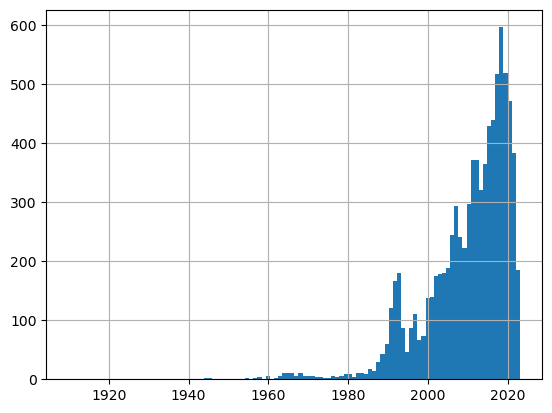

In [337]:
book_df['details_Год издания'] = pd.to_numeric(book_df['details_Год издания'])
book_df['details_Год издания'].hist(bins=110)

In [ ]:
import 

In [288]:
for col in ['stats_love','stats_review','stats_citation','stats_read']:
    book_df[col] = pd.to_numeric(book_df[col])

In [332]:
book_author = (   
    book_df
    .groupby('book-author')
    [['stats_love','stats_review','stats_citation','stats_read', 'book-name']]
    .agg(
        {
            'stats_love': 'sum',
            'stats_review': 'sum',
            'stats_citation': 'sum',
            'stats_read': 'sum', 
            'book-name': 'nunique'
        }
    )
    .sort_values(by='stats_read', ascending=False)
    .reset_index()
    .rename(
        columns = {
            'book-author': 'Author',
            'stats_love': 'Likes (sum)',
            'stats_review': 'Reviews (sum)',
            'stats_citation': 'Citations (sum)',
            'stats_read': 'Read (sum)', 
            'book-name': 'Num of books'
        }
    )
    .head(7)
    # .style.format(precision = 0, thousands = ' ')
    # .to_clipboard()
)

In [307]:
import matplotlib.pyplot as plt

In [328]:
author_dict = {
    'Рэй Брэдбери': 'Ray Bradbury ',
    'Аркадий и Борис Стругацкие': 'Arkady and Boris\n Strugatsky',
    'Джордж Оруэлл': 'George Orwell',
    'Сергей Лукьяненко': 'Sergey Lukyanenko',
    'Дэниел Киз': 'Daniel Keyes',
    'Сьюзен Коллинз': 'Susan Collins',
    'Стивен Кинг': 'Stephen King'
}

In [329]:
author_dict

{'Рэй Брэдбери': 'Ray Bradbury ',
 'Аркадий и Борис Стругацкие': 'Arkady and Boris\n Strugatsky',
 'Джордж Оруэлл': 'George Orwell',
 'Сергей Лукьяненко': 'Sergey Lukyanenko',
 'Дэниел Киз': 'Daniel Keyes',
 'Сьюзен Коллинз': 'Susan Collins',
 'Стивен Кинг': 'Stephen King'}

In [333]:
book_author['Author'] = book_author['Author'].apply(lambda x: author_dict[x])

In [334]:
book_author

Author  Likes (sum)  Reviews (sum)  Citations (sum)  \
0                  Ray Bradbury          8957        89622.0           152214   
1  Arkady and Boris\n Strugatsky         6278        37203.0            44690   
2                  George Orwell         5335         7573.0            12442   
3              Sergey Lukyanenko         2881         5237.0             9256   
4                   Daniel Keyes         7879         3120.0             2840   
5                  Susan Collins         4997         4802.0             3923   
6                   Stephen King         3126         8167.0            17011   

   Read (sum)  Num of books  
0    219588.0           161  
1    201000.0           107  
2    132277.0             4  
3    126594.0           102  
4    122401.0             3  
5    105462.0             6  
6     79708.0            60

In [336]:
import seaborn as sns 

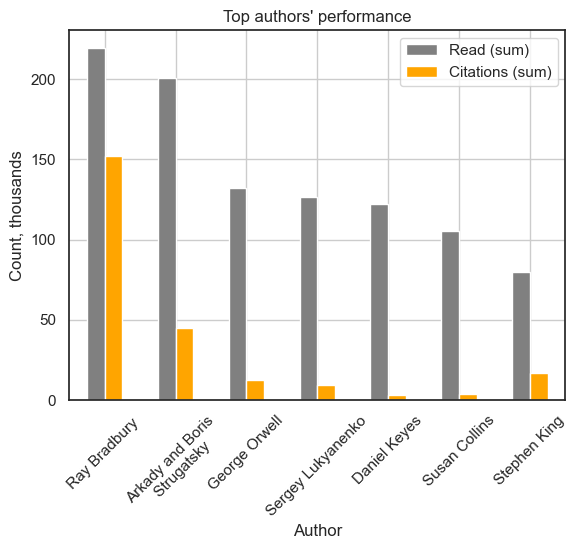

In [560]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
(book_author.set_index('Author')[['Read (sum)', 'Citations (sum)']]/1000).plot(kind='bar', ax=ax, color = ['gray', 'orange'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Count, thousands')
ax.set_title("Top authors' performance")

plt.savefig('graphs/authors.png', dpi=300)

In [380]:
top_authors = top_authors['Author'].values

In [381]:
top_authors

array(['Рэй Брэдбери', 'Аркадий и Борис Стругацкие', 'Джордж Оруэлл',
       'Сергей Лукьяненко', 'Дэниел Киз', 'Сьюзен Коллинз', 'Стивен Кинг'],
      dtype=object)

In [355]:
book_df.groupby('details_Издательство')['book-name'].count().sort_values(ascending=False).head(10)

details_Издательство
АСТ                        2060
Эксмо                      1685
Альфа-книга                 737
Азбука                      428
Фантастика Книжный Клуб     149
Fanzon                      130
Полярис                     116
ИДДК                        114
Центрполиграф               104
Эксмо-Пресс                 101
Name: book-name, dtype: int64

In [354]:
book_df
# разбить по жанрам прочитанное
# 

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                  451° по Фаренгейту       Рэй Брэдбери   
2                                1984      Джордж Оруэлл   
3                  О дивный новый мир       Олдос Хаксли   
4                                  Мы    Евгений Замятин   
...                               ...                ...   
10117                   Княжья служба    Юрий Корчевский   
10118                    Ангелы крови  Максим Макаренков   
10119                Гавань Командора     Алексей Волков   
10120               Солдат императора         Клим Жуков   
10121  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                                                  genres  stats_love  \
0       ['Зарубежная фантастика', 'Зарубежная классика']        7835   
1       ['Зарубежная фантастика', 'Зарубежная классика']        4893   
2       ['Зарубежная фантастика', 'Зарубежная классика']        3856   
3       ['Зарубежная классика', 'Зарубежная фантастика']        1719   
4      ['Отечественная фантастика', 'Социальная фанта...        1183   
...                                                  ...         ...   
10117                       ['Отечественная фантастика']           0   
10118                       ['Отечественная фантастика']           1   
10119                       ['Отечественная фантастика']           1   
10120                       ['Отечественная фантастика']           3   
10121   ['Русское фэнтези', 'Юмористическая фантастика']           0   

      stats_review stats_citation  stats_read       details_ISBN  \
0             3082           2791    120692.0  978-5-699-66017-9   
1             2073           4339    111360.0  978-5-699-81254-7   
2             1781           3117     92163.0  978-5-04-171583-0   
3             1386           1639     57560.0  978-5-17-133241-9   
4             1023           1539     42548.0      5-7107-1688-X   
...            ...            ...         ...                ...   
10117            0              0        23.0  978-5-9942-0345-3   
10118          NaN              3        27.0  978-5-9942-0120-6   
10119          NaN              0        24.0      5-9717-0442-7   
10120            0              1        23.0  978-5-699-41851-0   
10121            0              0        23.0      5-699-08359-6   

       details_Год издания details_Издательство  \
0                   2015.0                Эксмо   
1                   2015.0                Эксмо   
2                   2023.0            Like Book   
3                   2020.0                  АСТ   
4                   1998.0                Дрофа   
...                    ...                  ...   
10117               2009.0             Лениздат   
10118               2008.0             Лениздат   
10119               2007.0               Крылов   
10120               2010.0                Эксмо   
10121               2004.0                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1                100 главных книг (покет)      Русский   
2          Young Adult. Легендарные книги      Русский   
3                                  КИНО!!      Русский   
4                      Школьная программа      Русский   
...                                   ...          ...   
10117                              Атаман      Русский   
10118                   Боевая фантастика      Русский   
10119               Историческая авантюра      Русский   
10120                   Абсолютное оружие      Русский   
10121            Рабин Гут - принц ментов      Русский   

                                                abstract           cycle-title  
0      Сорок лет назад это считалось фантастикой. \nС...                   NaN  
1      451° по Фаренгейту - температура, при которой ...                   NaN  
2      Тоталитарное партийное государство Океания. Зд...                

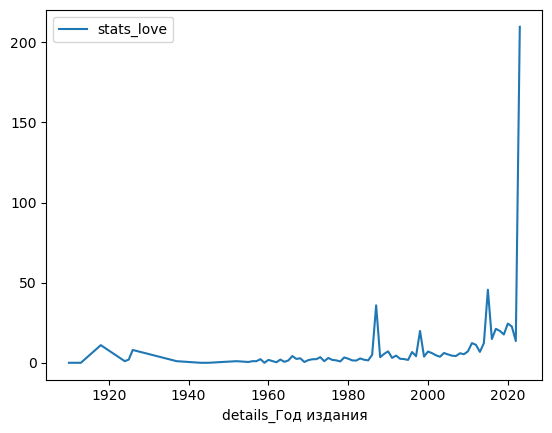

In [333]:
fig, ax = plt.subplots()

for el in ['stats_love']:

    book_df.pivot_table(
        index='details_Год издания',
        values=el, 
        aggfunc='mean'
    ).plot(ax=ax)

<AxesSubplot:xlabel='Year of publication', ylabel='Number of books'>

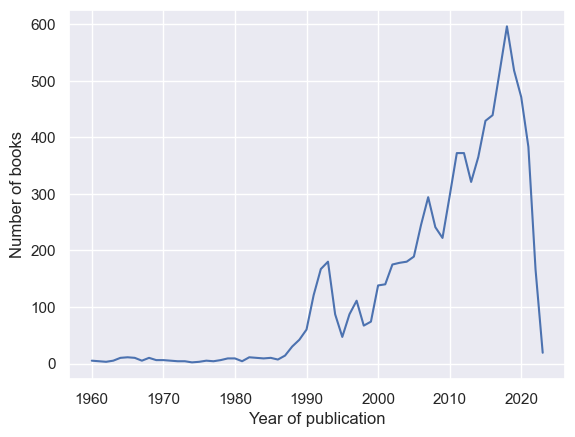

In [477]:
book_df.groupby('details_Год издания')['book-name'].count().loc[1960:].plot(
    xlabel='Year of publication', 
    ylabel='Number of books'
)

In [269]:
# driver.quit()
driver = webdriver.Safari()

In [270]:
ISBN = '978-5-699-66017-9'	
driver.get(f"https://www.livelib.ru/book/{ISBN}")
driver.execute_script("window.scrollTo(0, 900)") 

In [228]:
rating = driver.find_element(By.CLASS_NAME, 'bc-rating-medium').get_attribute('title')

In [303]:
book_markets = driver.find_element(By.ID, 'sources-api-ajax')#.find_element(By.CLASS_NAME, 'prlstores')#.find_element(By.CSS_SELECTOR, "[class='prlstores-type prlstores-type--wb1']")
# [el.get_attribute('data-store') for el in book_markets]

In [292]:
from bs4 import BeautifulSoup as bs

In [305]:
soup = bs(book_markets.get_attribute('outerHTML'))
print(soup.prettify())

<html>
 <body>
  <div id="sources-api-ajax" style="display: block;">
   <iframe data-book_id="459282" id="source-api-iframe" src="/book/getpriceblock?apikey=e63c683a3cd6a4c41e82dc4b718e0ff8&amp;edition_id=1000703959" style="width: 100%; height: 576px;">
   </iframe>
  </div>
 </body>
</html>


In [375]:
book_df.loc[(book_df['book-name'].str.contains('Метро')) & (book_df['book-author']=='Дмитрий Глуховский'), :]['stats_read'].sum()

39918.0

In [407]:
book_df.loc[(book_df['book-name'].str.contains('Дозор'))& (book_df['book-author'].str.contains('Сергей Лукьяненко')), :]['stats_read'].sum()

1849.0

In [414]:
3055 - 1849

1206

In [413]:
book_df.loc[(book_df['book-name'].str.contains('Дозор')), :]['stats_read'].sum()

3055.0

In [376]:
16242.0/39918.0

0.4068841124304825

In [ ]:
init = [1, 2, 3, 4, 5, 6]
x = [2, 3, 1, 5, 6, 4]



# Word could 

In [488]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [484]:
top_authors_list = top_authors['Author'].values

In [506]:
author_abstracts = {}
for author in top_authors_list:
    author_abstracts[author] = book_df[book_df['book-author'] == author]['abstract'].str.lower().dropna().values

In [507]:
with open('stop_words.txt', 'r') as f:
    stop_words = [line.strip('\n') for line in f.readlines()]

In [508]:
stop_words
stopwords = set(stop_words)

In [509]:
top_authors_map = {
    'Рэй Брэдбери': 'Ray Bradbury',
    'Аркадий и Борис Стругацкие': 'Arkady and Boris Strugatsky',
    'Джордж Оруэлл': 'George Orwell',
    'Сергей Лукьяненко': 'Sergey Lukyanenko',
    'Дэниел Киз': 'Daniel Keyes',
    'Сьюзен Коллинз': 'Susan Collins',
    'Стивен Кинг': 'Stephen King'
}

Рэй Брэдбери


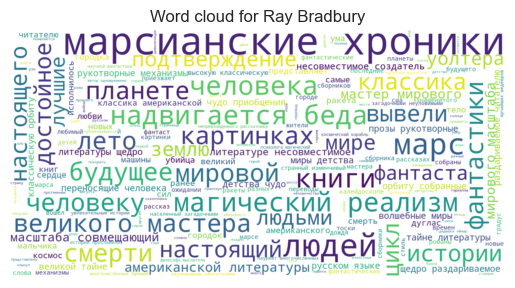

In [510]:
author_abstr_combined = ''
author = 'Рэй Брэдбери'
for abstract in author_abstracts[author]:
    author_abstr_combined += abstract
    author_abstr_combined += ' ' 

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(author_abstr_combined)

# Display the generated image:
# the matplotlib way:
print(author)

fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
ax.set_title(f'Word cloud for {top_authors_map[author]}')
fig.savefig(f'wordclouds/{author}.png', dpi=300,  bbox_inches='tight')
plt.show()

Рэй Брэдбери


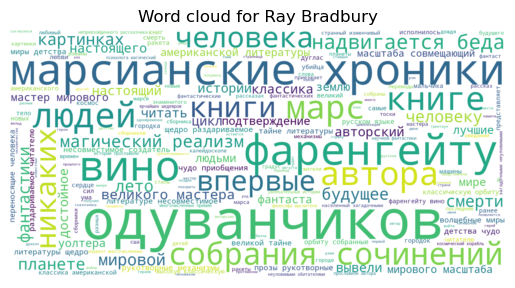

Аркадий и Борис Стругацкие


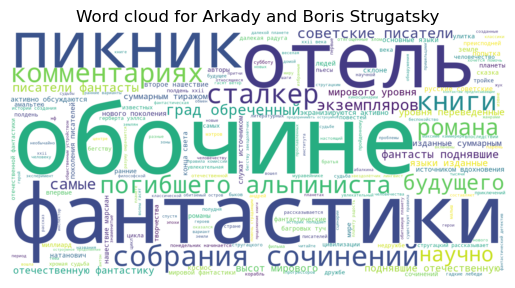

Джордж Оруэлл


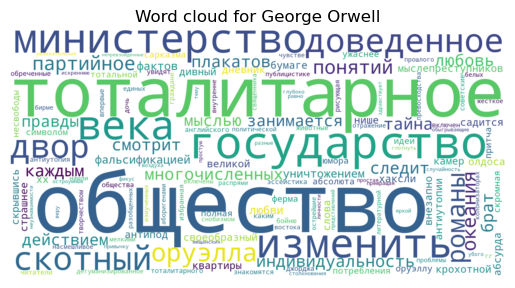

Сергей Лукьяненко


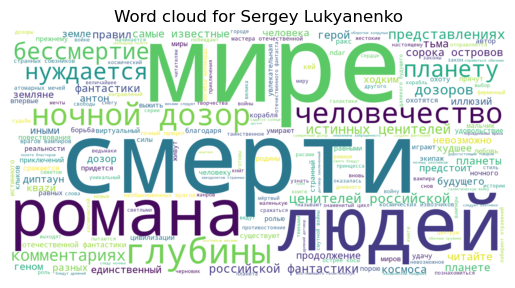

Дэниел Киз


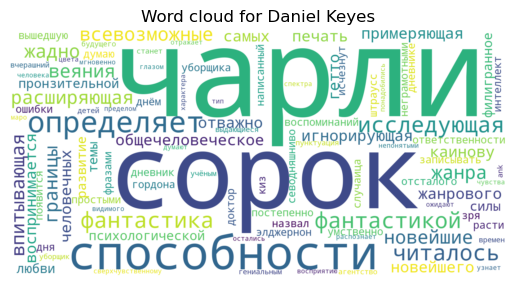

Сьюзен Коллинз


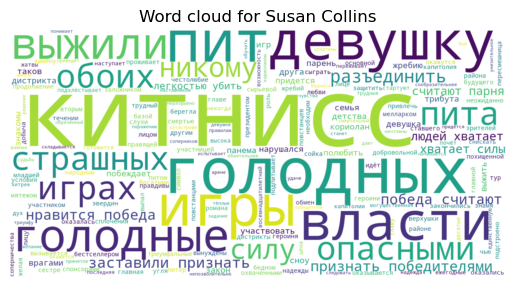

Стивен Кинг


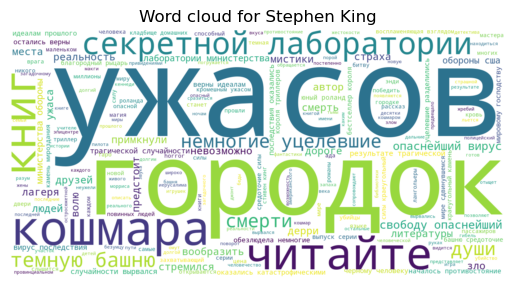

In [563]:
world_cloud_author = {}
for author in author_abstracts: 
    author_abstr_combined = ''
    for abstract in author_abstracts[author]:
        author_abstr_combined += abstract
        author_abstr_combined += ' ' 

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(author_abstr_combined)

    # Display the generated image:
    # the matplotlib way:
    print(author)

    fig, ax = plt.subplots()
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Word cloud for {top_authors_map[author]}')
    fig.savefig(f'wordclouds/{author}.png', dpi=300,  bbox_inches='tight')
    plt.show()
    

In [541]:
(   
    book_df.pivot_table(
        index='details_Год издания',
        values='book-name',
        aggfunc='nunique'
    )
)

book-name
details_Год издания           
1910.0                       1
1913.0                       1
1918.0                       1
1924.0                       1
1925.0                       1
...                        ...
2019.0                     512
2020.0                     463
2021.0                     370
2022.0                     165
2023.0                      19

[79 rows x 1 columns]

# Жанры

In [286]:
book_df

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                  451° по Фаренгейту       Рэй Брэдбери   
2                                1984      Джордж Оруэлл   
3                  О дивный новый мир       Олдос Хаксли   
4                                  Мы    Евгений Замятин   
...                               ...                ...   
10117                   Княжья служба    Юрий Корчевский   
10118                    Ангелы крови  Максим Макаренков   
10119                Гавань Командора     Алексей Волков   
10120               Солдат императора         Клим Жуков   
10121  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                                                  genres  stats_love  \
0       ['Зарубежная фантастика', 'Зарубежная классика']        7835   
1       ['Зарубежная фантастика', 'Зарубежная классика']        4893   
2       ['Зарубежная фантастика', 'Зарубежная классика']        3856   
3       ['Зарубежная классика', 'Зарубежная фантастика']        1719   
4      ['Отечественная фантастика', 'Социальная фанта...        1183   
...                                                  ...         ...   
10117                       ['Отечественная фантастика']           0   
10118                       ['Отечественная фантастика']           1   
10119                       ['Отечественная фантастика']           1   
10120                       ['Отечественная фантастика']           3   
10121   ['Русское фэнтези', 'Юмористическая фантастика']           0   

      stats_review stats_citation stats_read       details_ISBN  \
0             3082           2791     120692  978-5-699-66017-9   
1             2073           4339     111360  978-5-699-81254-7   
2             1781           3117      92163  978-5-04-171583-0   
3             1386           1639      57560  978-5-17-133241-9   
4             1023           1539      42548      5-7107-1688-X   
...            ...            ...        ...                ...   
10117            0              0         23  978-5-9942-0345-3   
10118          NaN              3         27  978-5-9942-0120-6   
10119          NaN              0         24      5-9717-0442-7   
10120            0              1         23  978-5-699-41851-0   
10121            0              0         23      5-699-08359-6   

       details_Год издания details_Издательство  \
0                   2015.0                Эксмо   
1                   2015.0                Эксмо   
2                   2023.0            Like Book   
3                   2020.0                  АСТ   
4                   1998.0                Дрофа   
...                    ...                  ...   
10117               2009.0             Лениздат   
10118               2008.0             Лениздат   
10119               2007.0               Крылов   
10120               2010.0                Эксмо   
10121               2004.0                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1                100 главных книг (покет)      Русский   
2          Young Adult. Легендарные книги      Русский   
3                                  КИНО!!      Русский   
4                      Школьная программа      Русский   
...                                   ...          ...   
10117                              Атаман      Русский   
10118                   Боевая фантастика      Русский   
10119               Историческая авантюра      Русский   
10120                   Абсолютное оружие      Русский   
10121            Рабин Гут - принц ментов      Русский   

                                                abstract           cycle-title  
0      Сорок лет назад это считалось фантастикой. \nС...                   NaN  
1      451° по Фаренгейту - температура, при которой ...                   NaN  
2      Тоталитарное партийное государство Океания. Зд...                   NaN  
3  

In [5]:
import pickle

In [478]:
with open("fantastic_livelib.pickle", 'rb') as f:
    book_json = pickle.load(f)

In [12]:
book_df_list_long = []
for book in book_json:
    book_flatten = flatten_dict(book, sep='_')
    book_df_list_long.append(pd.DataFrame().from_dict(book_flatten))

book_df_long = pd.concat(book_df_list_long, ignore_index=True)

In [13]:
for col in ['stats_love','stats_review','stats_citation','stats_read']:
    book_df_long[col] = pd.to_numeric(book_df_long[col])

In [15]:
book_df_long.head()

book-name    book-author                 genres  stats_love  \
0  Цветы для Элджернона     Дэниел Киз  Зарубежная фантастика        7835   
1  Цветы для Элджернона     Дэниел Киз    Зарубежная классика        7835   
2    451° по Фаренгейту   Рэй Брэдбери  Зарубежная фантастика        4893   
3    451° по Фаренгейту   Рэй Брэдбери    Зарубежная классика        4893   
4                  1984  Джордж Оруэлл  Зарубежная фантастика        3856   

   stats_review  stats_citation  stats_read       details_ISBN  \
0        3082.0            2791    120692.0  978-5-699-66017-9   
1        3082.0            2791    120692.0  978-5-699-66017-9   
2        2073.0            4339    111360.0  978-5-699-81254-7   
3        2073.0            4339    111360.0  978-5-699-81254-7   
4        1781.0            3117     92163.0  978-5-04-171583-0   

  details_Год издания details_Издательство  \
0                2015                Эксмо   
1                2015                Эксмо   
2                2015                Эксмо   
3                2015                Эксмо   
4                2023            Like Book   

                        details_Серия details_Язык  \
0  Интеллектуальный бестселлер (мини)      Русский   
1  Интеллектуальный бестселлер (мини)      Русский   
2            100 главных книг (покет)      Русский   
3            100 главных книг (покет)      Русский   
4      Young Adult. Легендарные книги      Русский   

                                            abstract cycle-title details_Языки  
0  Сорок лет назад это считалось фантастикой. \nС...         NaN           NaN  
1  Сорок лет назад это считалось фантастикой. \nС...         NaN           NaN  
2  451° по Фаренгейту - температура, при которой ...         NaN           NaN  
3  451° по Фаренгейту - температура, при которой ...         NaN           NaN  
4  Тоталитарное партийное государство Океания. Зд...         NaN           NaN

In [535]:
book_df_long.loc[book_df_long['genres'].str.contains('Боевая фантастика'), 'genres'] = (
    book_df_long
    [book_df_long['genres'].str.contains('Боевая фантастика')]
    ['genres']
    .str.split()
    .apply(lambda x: x[-2]+' ' + x[-1])
)

book_df_long.loc[book_df_long['genres'].str.contains('Боевики'), 'genres'] = (
    book_df_long
    [book_df_long['genres'].str.contains('Боевики')]
    ['genres']
    .str.split()
    .apply(lambda x: x[-1])
)

book_df_long.loc[book_df_long['genres'].str.contains('Триллеры'), 'genres'] = (
    book_df_long
    [book_df_long['genres'].str.contains('Триллеры')]
    ['genres']
    .str.split()
    .apply(lambda x: x[-1])
)

In [423]:
top_genres = book_df_long.groupby('genres')['book-name'].count().sort_values(ascending=False).head(10)
top_genres = top_genres.index

In [424]:
top_genres

Index(['Зарубежная фантастика', 'Отечественная фантастика',
       'Научная фантастика', 'Фантастика', 'Боевая фантастика',
       'Зарубежная классика', 'Космическая фантастика',
       'Героическая фантастика', 'Русское фэнтези',
       'Современная зарубежная литература'],
      dtype='object', name='genres')

In [425]:
book_df_long

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                Цветы для Элджернона         Дэниел Киз   
2                  451° по Фаренгейту       Рэй Брэдбери   
3                  451° по Фаренгейту       Рэй Брэдбери   
4                                1984      Джордж Оруэлл   
...                               ...                ...   
16975                    Ангелы крови  Максим Макаренков   
16976                Гавань Командора     Алексей Волков   
16977               Солдат императора         Клим Жуков   
16978  Двенадцать подвигов Рабин Гута      Алексей Лютый   
16979  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                          genres  stats_love  stats_review  stats_citation  \
0          Зарубежная фантастика        7835        3082.0            2791   
1            Зарубежная классика        7835        3082.0            2791   
2          Зарубежная фантастика        4893        2073.0            4339   
3            Зарубежная классика        4893        2073.0            4339   
4          Зарубежная фантастика        3856        1781.0            3117   
...                          ...         ...           ...             ...   
16975   Отечественная фантастика           1           NaN               3   
16976   Отечественная фантастика           1           NaN               0   
16977   Отечественная фантастика           3           0.0               1   
16978            Русское фэнтези           0           0.0               0   
16979  Юмористическая фантастика           0           0.0               0   

       stats_read       details_ISBN details_Год издания details_Издательство  \
0        120692.0  978-5-699-66017-9                2015                Эксмо   
1        120692.0  978-5-699-66017-9                2015                Эксмо   
2        111360.0  978-5-699-81254-7                2015                Эксмо   
3        111360.0  978-5-699-81254-7                2015                Эксмо   
4         92163.0  978-5-04-171583-0                2023            Like Book   
...           ...                ...                 ...                  ...   
16975        27.0  978-5-9942-0120-6                2008             Лениздат   
16976        24.0      5-9717-0442-7                2007               Крылов   
16977        23.0  978-5-699-41851-0                2010                Эксмо   
16978        23.0      5-699-08359-6                2004                Эксмо   
16979        23.0      5-699-08359-6                2004                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1      Интеллектуальный бестселлер (мини)      Русский   
2                100 главных книг (покет)      Русский   
3                100 главных книг (покет)      Русский   
4          Young Adult. Легендарные книги      Русский   
...                                   ...          ...   
16975                   Боевая фантастика      Русский   
16976               Историческая авантюра      Русский   
16977                   Абсолютное оружие      Русский   
16978            Рабин Гут - принц ментов      Русский   
16979            Рабин Гут - принц ментов      Русский   

                                                abstract  \
0      Сорок лет назад это считалось фантастикой. \nС...   
1      Сорок лет назад это считалось фантастикой. \nС...   
2      451° по Фаренгейту - температура, при которой ...   
3      451° по Фаренгейту - температура, при которой ...   
4      Тоталитарное партийное государство Океания. Зд...   
...                                                  ...   
16975  Мир, в котором отгремели войны богов, вздохнул...   
16976  Нелегок путь на родину. \n Бывшие пассажиры кр...   
16977  Невинная шалость с дочерью главы Академии гума...   
16978  Рано радовались менты, вернувшиеся в свою реал...   
16979  Рано радовались менты, вернувшиес

In [435]:
map_genres = {
    'Зарубежная фантастика': 'Foreign fiction',
    'Отечественная фантастика': 'Domestic fiction',
    'Научная фантастика': 'Science fiction',
    'Фантастика': 'Fantasy',
    'Боевая фантастика': 'Fighting fiction',
    'Зарубежная классика': 'Foreign classic',
    'Космическая фантастика': 'Cosmic classic',
    'Героическая фантастика': 'Heroic fiction',
    'Русское фэнтези': 'Russian fantasy',
    'Современная зарубежная литература': 'Modern foreign literature'
}


In [448]:
book_df_long['genres'].unique()

array(['Зарубежная фантастика', 'Зарубежная классика',
       'Отечественная фантастика', 'Социальная фантастика',
       'Научная фантастика', 'Литература 20 века', 'Книги для подростков',
       'Приключения', 'Современная зарубежная литература',
       'Космическая фантастика', 'Героическая фантастика',
       '№45\xa0в\xa0Триллеры', 'Детективная фантастика', 'Фантастика',
       'Советская литература', 'Ужасы, мистика',
       'Современные любовные романы', 'Любовно-фантастические романы',
       'Зарубежные детские книги', '№41\xa0в\xa0Триллеры', 'Киберпанк',
       'Современная русская литература', 'Ужасы', 'Русская классика',
       '№62\xa0в\xa0Триллеры', 'Фэнтези', 'Детская фантастика',
       'Современная проза', 'Фэнтези про драконов', 'Зарубежное фэнтези',
       '№72\xa0в\xa0Триллеры', 'Городское фэнтези', 'Русское фэнтези',
       'Триллеры', '№2\xa0в\xa0Бизнес-процессы',
       'Историческая фантастика', 'Юмористическая фантастика',
       'Периодические издания', '№1\xa

In [ ]:
book_df_long['type_domestic'] = pd.NA

In [454]:
book_df_long['type_domestic'] = pd.NA
book_df_long.loc[book_df_long['genres'].str.lower().str.contains('зарубежн'), 'type_domestic'] = 'Foreign'
book_df_long.loc[book_df_long['genres'].str.lower().str.contains('(отечествен|русск)', regex=True), 'type_domestic'] = 'Domestic'

/var/folders/g5/t0xcfm553jdfz_ghyf8w7s3m0000gn/T/ipykernel_62349/3500995291.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  book_df_long.loc[book_df_long['genres'].str.lower().str.contains('(отечествен|русск)', regex=True), 'type_domestic'] = 'Domestic'


In [469]:
book_df_long

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                Цветы для Элджернона         Дэниел Киз   
2                  451° по Фаренгейту       Рэй Брэдбери   
3                  451° по Фаренгейту       Рэй Брэдбери   
4                                1984      Джордж Оруэлл   
...                               ...                ...   
16975                    Ангелы крови  Максим Макаренков   
16976                Гавань Командора     Алексей Волков   
16977               Солдат императора         Клим Жуков   
16978  Двенадцать подвигов Рабин Гута      Алексей Лютый   
16979  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                          genres  stats_love  stats_review  stats_citation  \
0          Зарубежная фантастика        7835        3082.0            2791   
1            Зарубежная классика        7835        3082.0            2791   
2          Зарубежная фантастика        4893        2073.0            4339   
3            Зарубежная классика        4893        2073.0            4339   
4          Зарубежная фантастика        3856        1781.0            3117   
...                          ...         ...           ...             ...   
16975   Отечественная фантастика           1           NaN               3   
16976   Отечественная фантастика           1           NaN               0   
16977   Отечественная фантастика           3           0.0               1   
16978            Русское фэнтези           0           0.0               0   
16979  Юмористическая фантастика           0           0.0               0   

       stats_read       details_ISBN details_Год издания details_Издательство  \
0        120692.0  978-5-699-66017-9                2015                Эксмо   
1        120692.0  978-5-699-66017-9                2015                Эксмо   
2        111360.0  978-5-699-81254-7                2015                Эксмо   
3        111360.0  978-5-699-81254-7                2015                Эксмо   
4         92163.0  978-5-04-171583-0                2023            Like Book   
...           ...                ...                 ...                  ...   
16975        27.0  978-5-9942-0120-6                2008             Лениздат   
16976        24.0      5-9717-0442-7                2007               Крылов   
16977        23.0  978-5-699-41851-0                2010                Эксмо   
16978        23.0      5-699-08359-6                2004                Эксмо   
16979        23.0      5-699-08359-6                2004                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1      Интеллектуальный бестселлер (мини)      Русский   
2                100 главных книг (покет)      Русский   
3                100 главных книг (покет)      Русский   
4          Young Adult. Легендарные книги      Русский   
...                                   ...          ...   
16975                   Боевая фантастика      Русский   
16976               Историческая авантюра      Русский   
16977                   Абсолютное оружие      Русский   
16978            Рабин Гут - принц ментов      Русский   
16979            Рабин Гут - принц ментов      Русский   

                                                abstract  \
0      Сорок лет назад это считалось фантастикой. \nС...   
1      Сорок лет назад это считалось фантастикой. \nС...   
2      451° по Фаренгейту - температура, при которой ...   
3      451° по Фаренгейту - температура, при которой ...   
4      Тоталитарное партийное государство Океания. Зд...   
...                                                  ...   
16975  Мир, в котором отгремели войны богов, вздохнул...   
16976  Нелегок путь на родину. \n Бывшие пассажиры кр...   
16977  Невинная шалость с дочерью главы Академии гума...   
16978  Рано радовались менты, вернувшиеся в свою реал...   
16979  Рано радовались менты, вернувшиес

In [461]:
for_dom = (book_df_long[['type_domestic','book-name']].dropna().drop_duplicates())

In [468]:
book_df.merge(for_dom, on='book-name').pivot_table(
    index='type_domestic', 
    values=['stats_love','stats_review','stats_citation','stats_read'],
    aggfunc='sum'
).rename(
        columns = {
            'book-author': 'Author',
            'stats_love': 'Likes (sum)',
            'stats_review': 'Reviews (sum)',
            'stats_citation': 'Citations (sum)',
            'stats_read': 'Read (sum)', 
            'book-name': 'Num of books'
        }
    ).to_clipboard()

In [518]:
genres_agg = (
    book_df_long
    .rename(
        columns={
            'details_Год издания': 'Year'
        }
    )
    .assign(Year = lambda x: pd.to_numeric(x.Year))
    .assign(stats_read = lambda x: pd.to_numeric(x.stats_read))
    .query('genres in @top_genres')
    .assign(genres = lambda x: x.genres.apply(lambda x: map_genres.get(x)))
    .groupby('genres')
    [['stats_love','stats_review','stats_citation','stats_read', 'book-name']]
    .agg(
        {
            'stats_love': 'sum',
            'stats_review': 'sum',
            'stats_citation': 'sum',
            'stats_read': 'sum', 
            'book-name': 'nunique'
        }
    )
    .sort_values('book-name', ascending=True)
    #.plot(kind='barh', ylabel = 'Number of books')
    # .to_clipboard()
)

In [519]:
genres_agg['like_per_book'] = genres_agg['stats_love'] / genres_agg['book-name']

In [520]:
genres_agg[['book-name','like_per_book']]

book-name  like_per_book
genres                                             
Modern foreign literature        368      27.046196
Russian fantasy                  380       5.160526
Heroic fiction                   399       3.343358
Cosmic classic                   464       9.875000
Foreign classic                  623      45.980738
Fighting fiction                 885       2.249718
Fantasy                         1015       6.571429
Science fiction                 1049      18.993327
Domestic fiction                3183       7.866792
Foreign fiction                 4270      18.337237

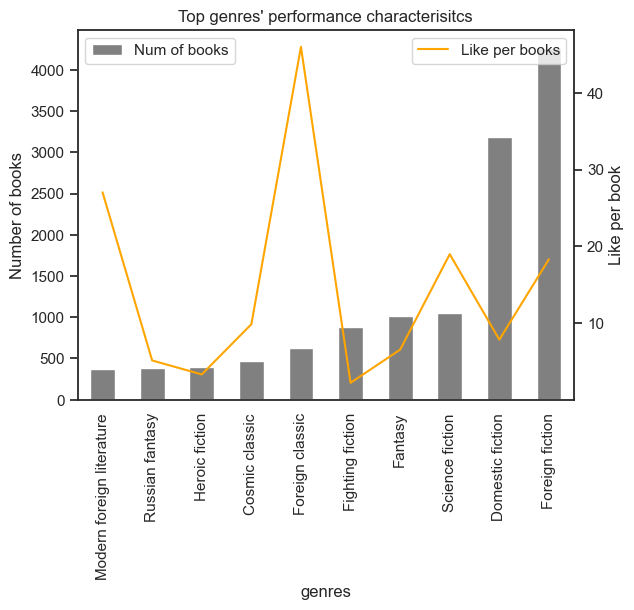

In [559]:
fig, ax = plt.subplots()

sns.set_style('white')

genres_agg[['book-name']].rename(columns={
    'book-name': 'Num of books'
}).plot(kind='bar', ax=ax, color='gray')


ax2 = ax.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
genres_agg[['like_per_book']].rename(columns={
    'like_per_book': 'Like per books'
}).plot(ax=ax2, kind='line', color='orange')

ax.set_ylabel('Number of books')
ax2.set_ylabel('Like per book')
ax.set_title("Top genres' performance characterisitcs")

plt.savefig('graphs/genres.png', dpi=300)

In [ ]:
book_df['book-author'].str.contains('Сергей Лукьяненко')

0        False
1        False
2        False
3        False
4        False
         ...  
10117    False
10118    False
10119    False
10120    False
10121    False
Name: book-author, Length: 10122, dtype: object

In [443]:
3183/4270

0.7454332552693208

In [440]:
book_df_long

book-name        book-author  \
0                Цветы для Элджернона         Дэниел Киз   
1                Цветы для Элджернона         Дэниел Киз   
2                  451° по Фаренгейту       Рэй Брэдбери   
3                  451° по Фаренгейту       Рэй Брэдбери   
4                                1984      Джордж Оруэлл   
...                               ...                ...   
16975                    Ангелы крови  Максим Макаренков   
16976                Гавань Командора     Алексей Волков   
16977               Солдат императора         Клим Жуков   
16978  Двенадцать подвигов Рабин Гута      Алексей Лютый   
16979  Двенадцать подвигов Рабин Гута      Алексей Лютый   

                          genres  stats_love  stats_review  stats_citation  \
0          Зарубежная фантастика        7835        3082.0            2791   
1            Зарубежная классика        7835        3082.0            2791   
2          Зарубежная фантастика        4893        2073.0            4339   
3            Зарубежная классика        4893        2073.0            4339   
4          Зарубежная фантастика        3856        1781.0            3117   
...                          ...         ...           ...             ...   
16975   Отечественная фантастика           1           NaN               3   
16976   Отечественная фантастика           1           NaN               0   
16977   Отечественная фантастика           3           0.0               1   
16978            Русское фэнтези           0           0.0               0   
16979  Юмористическая фантастика           0           0.0               0   

       stats_read       details_ISBN details_Год издания details_Издательство  \
0        120692.0  978-5-699-66017-9                2015                Эксмо   
1        120692.0  978-5-699-66017-9                2015                Эксмо   
2        111360.0  978-5-699-81254-7                2015                Эксмо   
3        111360.0  978-5-699-81254-7                2015                Эксмо   
4         92163.0  978-5-04-171583-0                2023            Like Book   
...           ...                ...                 ...                  ...   
16975        27.0  978-5-9942-0120-6                2008             Лениздат   
16976        24.0      5-9717-0442-7                2007               Крылов   
16977        23.0  978-5-699-41851-0                2010                Эксмо   
16978        23.0      5-699-08359-6                2004                Эксмо   
16979        23.0      5-699-08359-6                2004                Эксмо   

                            details_Серия details_Язык  \
0      Интеллектуальный бестселлер (мини)      Русский   
1      Интеллектуальный бестселлер (мини)      Русский   
2                100 главных книг (покет)      Русский   
3                100 главных книг (покет)      Русский   
4          Young Adult. Легендарные книги      Русский   
...                                   ...          ...   
16975                   Боевая фантастика      Русский   
16976               Историческая авантюра      Русский   
16977                   Абсолютное оружие      Русский   
16978            Рабин Гут - принц ментов      Русский   
16979            Рабин Гут - принц ментов      Русский   

                                                abstract  \
0      Сорок лет назад это считалось фантастикой. \nС...   
1      Сорок лет назад это считалось фантастикой. \nС...   
2      451° по Фаренгейту - температура, при которой ...   
3      451° по Фаренгейту - температура, при которой ...   
4      Тоталитарное партийное государство Океания. Зд...   
...                                                  ...   
16975  Мир, в котором отгремели войны богов, вздохнул...   
16976  Нелегок путь на родину. \n Бывшие пассажиры кр...   
16977  Невинная шалость с дочерью главы Академии гума...   
16978  Рано радовались менты, вернувшиеся в свою реал...   
16979  Рано радовались менты, вернувшиес

# Magical realism

In [416]:
book_df["abstract"].str.contains('(магическ|мистическ).*реал.*',regex=True).sum()

/var/folders/g5/t0xcfm553jdfz_ghyf8w7s3m0000gn/T/ipykernel_62349/3515647995.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  book_df["abstract"].str.contains('(магическ|мистическ).*реал.*',regex=True).sum()


27

In [421]:
book_df.loc[book_df["abstract"].str.contains('магический.*реализм.*',regex=True).fillna(False), :]

book-name   book-author  \
2529  451° по Фаренгейту. Механизмы радости  Рэй Брэдбери   
3515            451 по Фаренгейту. Рассказы  Рэй Брэдбери   
3896         Вихри Мраморной арки (сборник)  Конни Уиллис   

                                                genres  stats_love  \
2529                         ['Зарубежная фантастика']           5   
3515  ['Зарубежная классика', 'Зарубежная фантастика']           0   
3896    ['Зарубежная фантастика', 'Боевая фантастика']           3   

      stats_review  stats_citation  stats_read  \
2529           NaN               6         NaN   
3515           NaN              41       115.0   
3896          37.0               8       102.0   

                                           details_ISBN  details_Год издания  \
2529                                  978-5-699-81124-3               2015.0   
3515                                  978-5-699-81054-3               2015.0   
3896  978-5-17-065597-7,  978-5-271-31114-7,  978-5-...               2010.0   

     details_Издательство                    details_Серия details_Язык  \
2529                Эксмо                 100 главных книг      Русский   
3515                Эксмо  Библиотека всемирной литературы      Русский   
3896                  АСТ                       Сны Разума      Русский   

                                               abstract cycle-title  
2529  Великий, удивительный, абсолютно неподражаемый...         NaN  
3515  Великий, удивительный, абсолютно неподражаемый...         NaN  
3896  Лучшие рассказы Конни Уиллис. \nРассказы, кажд...         NaN

In [420]:
book_df.loc[book_df["abstract"].str.contains('(магическ|мистическ).*реал.*',regex=True).fillna(False), :]

/var/folders/g5/t0xcfm553jdfz_ghyf8w7s3m0000gn/T/ipykernel_62349/1032471531.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  book_df.loc[book_df["abstract"].str.contains('(магическ|мистическ).*реал.*',regex=True).fillna(False), :]


book-name           book-author  \
364                   Играть, чтобы жить. Книга 2. Клан           Дмитрий Рус   
795                      Истина — пещера в Черных горах            Нил Гейман   
947                                  Изобретение Мореля  Адольфо Бьой Касарес   
1309                       Файролл. Сицилианская защита       Андрей Васильев   
1805                        Последние дни Нового Парижа         Чайна Мьевиль   
1959                   Башня из грязи и веток (сборник)      Ярослав Барсуков   
2225                                        Скелет Бога                 Zотов   
2529              451° по Фаренгейту. Механизмы радости          Рэй Брэдбери   
2532                       Канал имени Москвы. Лабиринт                Аноним   
3515                        451 по Фаренгейту. Рассказы          Рэй Брэдбери   
3523                    Канал имени Москвы. Университет                Аноним   
3656                         Скалолазка и мировое древо          Олег Синицын   
3789  Большое собрание мистических историй в одном т...        Густав Майринк   
3896                     Вихри Мраморной арки (сборник)          Конни Уиллис   
4358        Сломанный меч. Дети морского царя (сборник)          Пол Андерсон   
4642                                Роман лорда Байрона           Джон Краули   
4776                                     Зов в сумерках            Анна Велес   
4907                                  Марш экклезиастов       Андрей Лазарчук   
5435                                            Алхимик         Алексей Абвов   
5583                                  Маски иллюминатов          Р. А. Уилсон   
7342  Лучшее за год: Мистика. Магический реализм. Фэ...                   NaN   
7346                                      Золотой Демон      Александр Бушков   
7726  Харчевня двух ведьм. Лучшие мистические истори...                   NaN   
8236  Лачуга должника и другие сказки для умных (сбо...          Вадим Шефнер   
8546  Лучшее за год 2005: Мистика, магический реализ...                   NaN   
8756                                 Мумия. Возвращение    Макс Аллан Коллинс   
8792                                              Вепрь           Олег Егоров   

                                                 genres  stats_love  \
364      ['Отечественная фантастика', 'Боевое фэнтези']          26   
795   ['Современная зарубежная литература', 'Зарубеж...          22   
947    ['Зарубежная классика', 'Зарубежная фантастика']          13   
1309          ['Отечественная фантастика', 'Киберпанк']           1   
1805                          ['Зарубежная фантастика']           5   
1959                          ['Социальная фантастика']          65   
2225     ['Отечественная фантастика', 'Ужасы, мистика']           3   
2529                          ['Зарубежная фантастика']           5   
2532     ['Ужасы, мистика', 'Отечественная фантастика']           6   
3515   ['Зарубежная классика', 'Зарубежная фантастика']           0   
3523  ['Социальная фантастика', 'Отечественная фанта...           3   
3656  ['Отечественная фантастика', 'Боевая фантастика']           3   
3789                         ['Фантастика', 'Сборники']           4   
3896     ['Зарубежная фантастика', 'Боевая фантастика']           3   
4358                          ['Зарубежная фантастика']           5   
4642  ['Современная зарубежная литература', 'Зарубеж...           2   
4776       ['Ужасы, мистика', 'Детективная фантастика']           1   
4907                       ['Отечественная фантастика']           0   
5435  ['Отечественная фантастика', 'Боевая фантастика']           0   
5583                          ['Зарубежная фантастика']           5   
7342               ['Фантастика', 'Зарубежное фэнтези']           1   
7346  ['Отечественная фантастика', 'Научная фантасти...           1   
7726              ['Фантастика', 'Зарубежная классика']           0   
8236  ['Отечественная фантастика', 'Литература 20 ве...           1   
85

# Года издания книг

In [547]:
book_df['details_Год издания']

0        2015.0
1        2015.0
2        2023.0
3        2020.0
4        1998.0
          ...  
10117    2009.0
10118    2008.0
10119    2007.0
10120    2010.0
10121    2004.0
Name: details_Год издания, Length: 10122, dtype: float64

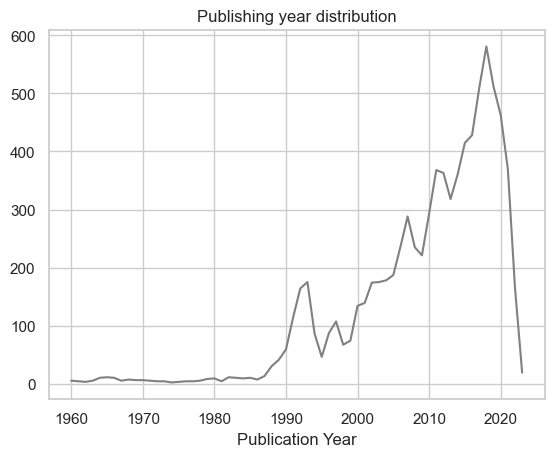

In [558]:
(
    book_df
    .groupby('details_Год издания')
    ['book-name']
    .nunique() 
    .loc[1960.:]
).plot(color='gray', title='Publishing year distribution', xlabel='Publication Year')
plt.savefig('graphs/years.png', dpi=300)